In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from src import EAAcFCM

In [16]:
def display_img(img: np.ndarray, cmap: str = None):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.imshow(img, cmap=cmap)
    plt.show()

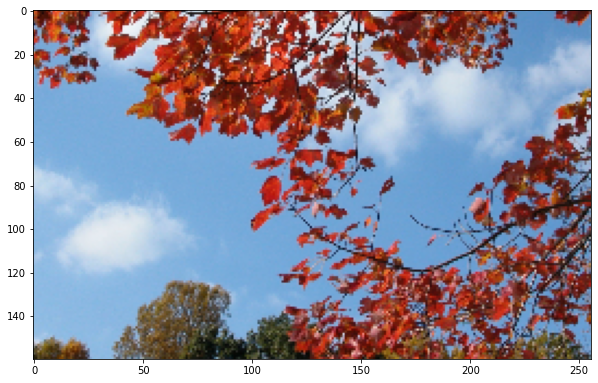

In [17]:
img = cv2.imread('data/nature.jpg')
img = cv2.resize(img, (256, 160))
img_2d = img.reshape(-1, 3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_1d = gray_img.reshape(-1, 1)
gray_img_1d = np.float32(gray_img_1d) / 255.

display_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
model = EAAcFCM(img_2d, 10)
best = model.run(1)

0) Best Individual: V_XB - 0.050019115016266366, Clusters - 2


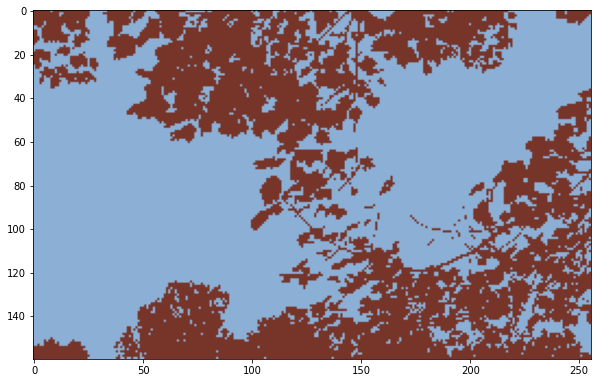

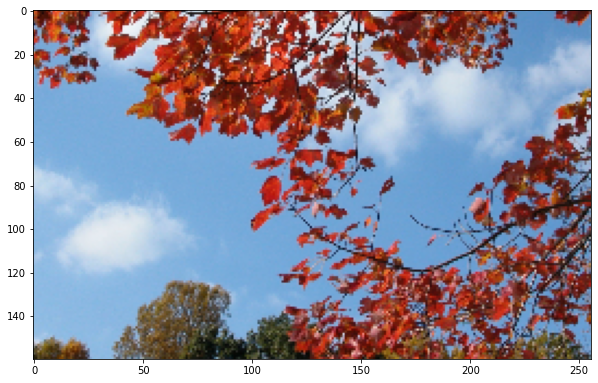

In [19]:
labels = np.argmax(best.U, axis=1)
color_mask = img_2d.copy()

for c in range(best.c):
    color_mask[labels == c] = np.mean(color_mask[labels == c], axis=0)
color_mask = color_mask.reshape(*gray_img.shape, 3)

display_img(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
display_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))